**(0) 문제정의**  
손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

- data => (442,10) 크기의 ndarray, 입력값
- target => (442, ) 크기의 ndarray, 타깃
- feature_names => data의 각 열의 특징 이름
- frame => (442,11)크기의 데이터 프레임(호출할 때 인자로 받은 as_frame=True일 때만 접근 가능)
- DESCR => 데이터셋의 설명
- data_filename => data의 위치경로
- target_filename => target의 위치경로
- (data,target) => 입력값과 타깃 튜플 (return_X_y=True일 때만 접근 가능)  

**(1) 데이터 가져오기**

In [1]:
# sklearn
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

#diabetes

df_X=diabetes.data
df_y=diabetes.target


In [9]:
# feature 확인 
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [12]:
# 데이터 확인 --> 442 개의 row, 10개의 feature 
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [10]:
# 데아터 탐색을 통해 더미변수를 사용할지 체크, 모든 특성이 -0.2 ~ 0.2 사이에 분포하도록 조정됨
print('<df_X[0]> : ',df_X[0])
print()
print('<df_y[0]> : ',df_y[0] )

<x_data[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

<y_data[0]> :  151.0


**(2) 모델에 입력할 데이터 X 준비하기**

In [22]:
import numpy as np 

X = np.array(df_X)

**(3) 모델에 예측할 데이터 y 준비하기**

In [23]:
# type(df_y)  : df_y
y = np.array(df_y)

**(4) train 데이터와 test 데이터로 분리하기**

In [24]:
#  sklearn .train_test_split 을 사용한 train 과 test 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(353, 10) (353,)
(89, 10) (89,)


**(5) 모델 준비하기**

In [25]:
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.

W = np.random.rand(10)
b = np.random.rand()

# 모델준비
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

**(6) 손실함수 loss 정의하기**

In [45]:
# MSE 사용하여  손실함수 계산
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

## error 계산 
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


**(7) 기울기를 구하는 gradient 함수 구현하기**

In [46]:
## 경사하강법에 의한 gradient를 다변수 방정식의 편미분을 이해하고 구현하기
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

#dW, db = gradient(X, W, b, y)
#print("dW:", dW)
#print("db:", db)


**(8) 하이퍼 파라미터인 학습률 설정하기**

In [57]:
# 학습률
LEARNING_RATE = 0.01  # 0.0001 이면 loss 가 너무 크다  줄이면 loss 가 작아진다.


**(9) 모델 학습하기**

In [58]:
losses = []

for i in range(1, 10000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4703.4496
Iteration 20 : Loss 4699.6594
Iteration 30 : Loss 4695.8801
Iteration 40 : Loss 4692.1118
Iteration 50 : Loss 4688.3544
Iteration 60 : Loss 4684.6079
Iteration 70 : Loss 4680.8722
Iteration 80 : Loss 4677.1474
Iteration 90 : Loss 4673.4333
Iteration 100 : Loss 4669.7299
Iteration 110 : Loss 4666.0372
Iteration 120 : Loss 4662.3552
Iteration 130 : Loss 4658.6838
Iteration 140 : Loss 4655.0230
Iteration 150 : Loss 4651.3728
Iteration 160 : Loss 4647.7330
Iteration 170 : Loss 4644.1038
Iteration 180 : Loss 4640.4850
Iteration 190 : Loss 4636.8766
Iteration 200 : Loss 4633.2786
Iteration 210 : Loss 4629.6909
Iteration 220 : Loss 4626.1136
Iteration 230 : Loss 4622.5465
Iteration 240 : Loss 4618.9896
Iteration 250 : Loss 4615.4430
Iteration 260 : Loss 4611.9065
Iteration 270 : Loss 4608.3802
Iteration 280 : Loss 4604.8640
Iteration 290 : Loss 4601.3579
Iteration 300 : Loss 4597.8617
Iteration 310 : Loss 4594.3756
Iteration 320 : Loss 4590.8995
Iteration 330 : L

Iteration 3950 : Loss 3787.6856
Iteration 3960 : Loss 3786.3308
Iteration 3970 : Loss 3784.9791
Iteration 3980 : Loss 3783.6305
Iteration 3990 : Loss 3782.2850
Iteration 4000 : Loss 3780.9426
Iteration 4010 : Loss 3779.6033
Iteration 4020 : Loss 3778.2669
Iteration 4030 : Loss 3776.9337
Iteration 4040 : Loss 3775.6035
Iteration 4050 : Loss 3774.2763
Iteration 4060 : Loss 3772.9521
Iteration 4070 : Loss 3771.6310
Iteration 4080 : Loss 3770.3128
Iteration 4090 : Loss 3768.9976
Iteration 4100 : Loss 3767.6855
Iteration 4110 : Loss 3766.3763
Iteration 4120 : Loss 3765.0700
Iteration 4130 : Loss 3763.7667
Iteration 4140 : Loss 3762.4664
Iteration 4150 : Loss 3761.1690
Iteration 4160 : Loss 3759.8745
Iteration 4170 : Loss 3758.5830
Iteration 4180 : Loss 3757.2944
Iteration 4190 : Loss 3756.0087
Iteration 4200 : Loss 3754.7258
Iteration 4210 : Loss 3753.4459
Iteration 4220 : Loss 3752.1688
Iteration 4230 : Loss 3750.8946
Iteration 4240 : Loss 3749.6233
Iteration 4250 : Loss 3748.3548
Iteratio

Iteration 6550 : Loss 3517.7877
Iteration 6560 : Loss 3516.9988
Iteration 6570 : Loss 3516.2114
Iteration 6580 : Loss 3515.4254
Iteration 6590 : Loss 3514.6409
Iteration 6600 : Loss 3513.8579
Iteration 6610 : Loss 3513.0763
Iteration 6620 : Loss 3512.2962
Iteration 6630 : Loss 3511.5176
Iteration 6640 : Loss 3510.7403
Iteration 6650 : Loss 3509.9646
Iteration 6660 : Loss 3509.1903
Iteration 6670 : Loss 3508.4174
Iteration 6680 : Loss 3507.6459
Iteration 6690 : Loss 3506.8759
Iteration 6700 : Loss 3506.1073
Iteration 6710 : Loss 3505.3401
Iteration 6720 : Loss 3504.5744
Iteration 6730 : Loss 3503.8100
Iteration 6740 : Loss 3503.0471
Iteration 6750 : Loss 3502.2855
Iteration 6760 : Loss 3501.5254
Iteration 6770 : Loss 3500.7667
Iteration 6780 : Loss 3500.0094
Iteration 6790 : Loss 3499.2534
Iteration 6800 : Loss 3498.4989
Iteration 6810 : Loss 3497.7457
Iteration 6820 : Loss 3496.9939
Iteration 6830 : Loss 3496.2435
Iteration 6840 : Loss 3495.4945
Iteration 6850 : Loss 3494.7468
Iteratio

Iteration 9270 : Loss 3346.9007
Iteration 9280 : Loss 3346.4019
Iteration 9290 : Loss 3345.9038
Iteration 9300 : Loss 3345.4065
Iteration 9310 : Loss 3344.9099
Iteration 9320 : Loss 3344.4141
Iteration 9330 : Loss 3343.9190
Iteration 9340 : Loss 3343.4247
Iteration 9350 : Loss 3342.9312
Iteration 9360 : Loss 3342.4383
Iteration 9370 : Loss 3341.9462
Iteration 9380 : Loss 3341.4549
Iteration 9390 : Loss 3340.9643
Iteration 9400 : Loss 3340.4744
Iteration 9410 : Loss 3339.9853
Iteration 9420 : Loss 3339.4969
Iteration 9430 : Loss 3339.0092
Iteration 9440 : Loss 3338.5223
Iteration 9450 : Loss 3338.0361
Iteration 9460 : Loss 3337.5506
Iteration 9470 : Loss 3337.0658
Iteration 9480 : Loss 3336.5818
Iteration 9490 : Loss 3336.0985
Iteration 9500 : Loss 3335.6159
Iteration 9510 : Loss 3335.1340
Iteration 9520 : Loss 3334.6529
Iteration 9530 : Loss 3334.1724
Iteration 9540 : Loss 3333.6927
Iteration 9550 : Loss 3333.2137
Iteration 9560 : Loss 3332.7354
Iteration 9570 : Loss 3332.2578
Iteratio

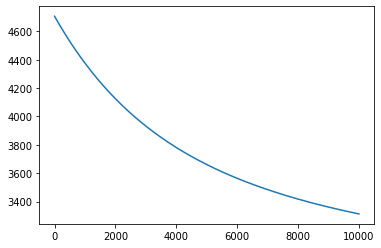

In [59]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

**(10) test 데이터에 대한 성능 확인하기**

In [60]:
# test 데이터 예측하여  loss값 확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3013.2293084118733

**(11) 정답 데이터와 예측한 데이터 시각화하기**

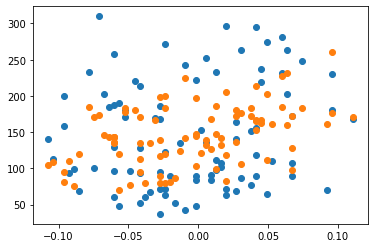

In [61]:
# prediction과 실제 정답인 y_test를 비교하여 정답률 그래프 확인


plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()  # x축에는 total_bill을, y축에는 각각 tip값과 prediction 값을 표시

